In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install evaluate
!pip install seaborn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv("https://drive.google.com/uc?id=1Xm3HWAnrHjLmvPTMVIMW4q624SBr_SCH")

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.isna().sum()

,0
review,0
sentiment,0


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


<Axes: title={'center': 'Words per Tweet'}, xlabel='sentiment'>

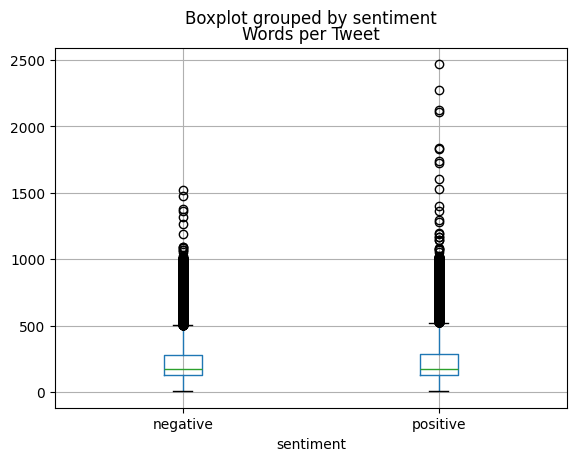

In [ ]:
df['Words per Tweet'] = df['review'].str.split().apply(len)
df.boxplot("Words per Tweet", by="sentiment")

In [ ]:
df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
import re

def text_preprocess(sentence):
    sentence = re.sub(r'<br />', '', sentence)
    sentence = re.sub(r'@\w+', '', sentence).strip()
    sentence = re.sub(r'[^a-zA-Z\s]+', '', sentence).strip()
    sentence = sentence.lower()
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [ ]:
df1 = df.copy()

In [ ]:
df1['review'] = df1['review'].apply(lambda text: text_preprocess(text))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words = {re.sub(r"'", '', stop_word) for stop_word in stop_words}
stop_words.add('im')
stop_words.add('us')
stop_words.add('new')

In [ ]:
def clear_stopwords(text):
    words = re.findall(r'\b\w+\b',text)
    clean_words = [word for word in words if word not in stop_words]
    clean_text = " ".join(clean_words)
    return clean_text

In [ ]:
df1['review'] = df1['review'].apply(lambda text: clear_stopwords(text))

In [ ]:
from transformers import AutoTokenizer

In [ ]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
len(tokenizer.vocab),tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size=0.3, stratify=df1['sentiment'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['sentiment'])
train.shape, test.shape, validation.shape

((35000, 4), (10000, 4), (5000, 4))

In [ ]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment', 'Words per Tweet', 'label'],
        num_rows: 35000
    })
    test: Dataset({
        features: ['review', 'sentiment', 'Words per Tweet', 'label'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['review', 'sentiment', 'Words per Tweet', 'label'],
        num_rows: 5000
    })
})

In [ ]:
dataset['train'][0]

{'review': 'want see true thriller rent director screenwriter scream feature overacting overpaid tv actors passing stars run mill special effects bonanza instead get topnotch edgy strong violence yet thrilling nailbiter',
 'sentiment': 'positive',
 'Words per Tweet': 53,
 'label': 1}

In [ ]:
def tokenize(batch):
    temp= tokenizer(batch['review'], padding=True, truncation=True,max_length = 512, return_token_type_ids=True,)
    return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 2215, 2156, 2995, 10874, 9278, 2472, 11167, 6978, 3444, 2058, 18908, 2075, 2058, 4502, 3593, 2694, 5889, 4458, 3340, 2448, 4971, 2569, 3896, 14753, 16076, 2612, 2131, 2327, 17048, 2818, 3968, 6292, 2844, 4808, 2664, 26162, 13774, 16313, 2121, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2028, 2034, 2190, 8902, 25438, 2891, 4626, 2728, 12731, 14277, 4097, 4971, 5685, 2728, 12731, 14277, 2596, 2178, 8902, 25438, 2080, 2195, 16219, 2164, 4754, 11338, 3995, 11631, 2319, 2520, 21146, 18885, 2990, 13737, 4097, 4971, 5685, 2036, 2081, 2101, 3311, 2378, 2028, 4097, 4971, 5685, 6427, 3376, 2564, 2209, 10717, 20748, 6771, 28208, 12731, 14277, 8556, 12731, 14277, 25044, 2075, 2449, 2217, 3957, 4971, 5685, 8275, 3189, 17016, 20748, 2613, 2028, 3477, 2131, 4121, 2954, 12731, 14277, 2015, 2188, 7266, 7129, 4607, 8902

In [ ]:
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
label2id = {x['sentiment']:x['label'] for x in dataset ['train']}
id2label = {v:k for k,v in label2id.items()}
label2id, id2label

({'positive': 1, 'negative': 0}, {1: 'positive', 0: 'negative'})

In [ ]:
from transformers import AutoModel
import torch

In [ ]:
model= AutoModel.from_pretrained(model_ckpt)
model

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [ ]:
model.config

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.48.0",
  "vocab_size": 30522
}

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device ("cuda" if torch. cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
from transformers import TrainingArguments

batch_size=30
training_dir = "distilbert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              num_train_epochs = 2,
              learning_rate = 2e-5,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              weight_decay = 0.01,
              evaluation_strategy = 'epoch',
              disable_tqdm = False
    )

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-71-f7f22c6f6a80>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.274300,0.234567,0.903600,0.903566
2,0.187100,0.237978,0.909000,0.908999


TrainOutput(global_step=2334, training_loss=0.2485782930558833, metrics={'train_runtime': 3347.1329, 'train_samples_per_second': 20.913, 'train_steps_per_second': 0.697, 'total_flos': 9272717905920000.0, 'train_loss': 0.2485782930558833, 'epoch': 2.0})

In [ ]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

{'test_loss': 0.22734101116657257,
 'test_accuracy': 0.9154,
 'test_f1': 0.9153995127011931,
 'test_runtime': 142.2829,
 'test_samples_per_second': 70.283,
 'test_steps_per_second': 2.347}

In [ ]:
preds_output.predictions

array([[-2.0475159 ,  2.3632052 ],
       [-1.1638852 ,  1.504733  ],
       [ 2.508502  , -2.566621  ],
       ...,
       [ 0.61219937, -0.4916346 ],
       [ 2.2352793 , -2.3439648 ],
       [ 2.4853945 , -2.449291  ]], dtype=float32)

In [ ]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5000
           1       0.91      0.92      0.92      5000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



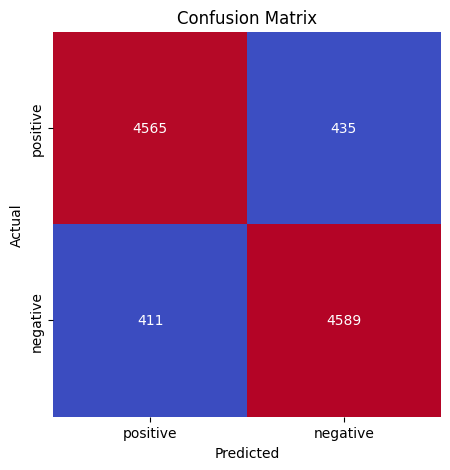

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt ='d', cbar=False, cmap='coolwarm')
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.show()

In [ ]:
text = '''A genius. My genius. I remember the exact second in 1994. I was sat in a pub in Shropshire, England. I recall the exact seat. "Bill Hicks dies of cancer" said the headline in the NME. I felt like someone had punched me in the stomach. Buy this DVD. If you don't find something in it one way or the other I'll be astonished.<br /><br />RIP Bill, I wish so much you were still here.'''

def get_prediction (text) :
    text = text_preprocess(text)
    text = clear_stopwords(text)
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1) .item()
    return id2label[pred]
get_prediction (text)


'positive'

In [ ]:
trainer.save_model("distilbert-base-uncased-sentiment-model")

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model= 'distilbert-base-uncased-sentiment-model')
classifier([text, 'A very good day indeed', "We loved mth111", "I am feeling anxious"])

Device set to use cuda:0


[{'label': 'positive', 'score': 0.5460618734359741},
 {'label': 'positive', 'score': 0.6783785223960876},
 {'label': 'positive', 'score': 0.8163019418716431},
 {'label': 'negative', 'score': 0.6140111088752747}]